In [60]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [61]:
_split = 0.8

## Arima for VCB dataset

In [62]:
data_path = '../../Dataset/VCB.csv';

In [63]:
# Load the stock data
data = pd.read_csv(data_path) 
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data[['Close']]

In [64]:
# Display dataset information
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2339 entries, 2015-01-05 to 2024-05-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2339 non-null   float64
dtypes: float64(1)
memory usage: 36.5 KB
None
              Close
count   2339.000000
mean   49573.071881
std    22421.327527
min    15680.371094
25%    25332.525391
50%    50432.792969
75%    66027.140625
max    97400.000000


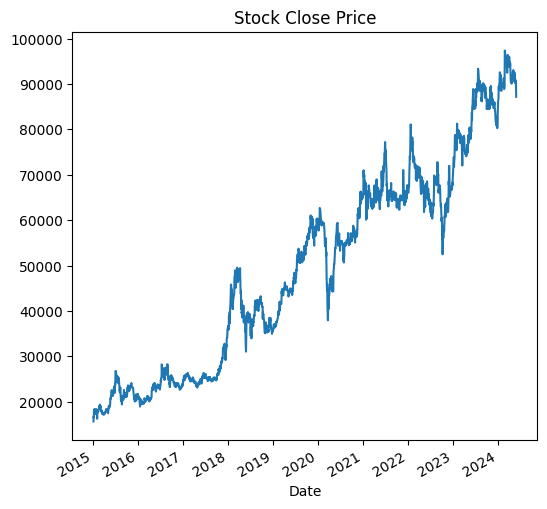

In [65]:
# Plot the data
data['Close'].plot(figsize=(6, 6))
plt.title("Stock Close Price")
plt.show()

In [66]:
# Split the data into training and test sets
train_size = int(len(data) * _split)
test_size = len(data) - train_size
train_data = data[0:train_size]
test_data = data[train_size:]

In [67]:
print("Training set shape:", train_data.shape)
print("Test set shape:", test_data.shape)

Training set shape: (1871, 1)
Test set shape: (468, 1)


In [68]:
# Perform initial ADF test
result = adfuller(data['Close'].dropna())
print(f'Initial ADF Statistic: {result[0]}')
print(f'Initial p-value: {result[1]}')

# Apply differencing iteratively until the series is stationary
differenced_data = data['Close']
diff_count = 0

while result[1] > 0.05:
    diff_count += 1
    differenced_data = differenced_data.diff().dropna()
    result = adfuller(differenced_data)
    print(f'Differencing Level: {diff_count}')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')

print(f'Series became stationary after {diff_count} differencing levels.')

Initial ADF Statistic: -0.7272181228151362
Initial p-value: 0.8395729143966156
Differencing Level: 1
ADF Statistic: -29.724375692103642
p-value: 0.0
Series became stationary after 1 differencing levels.


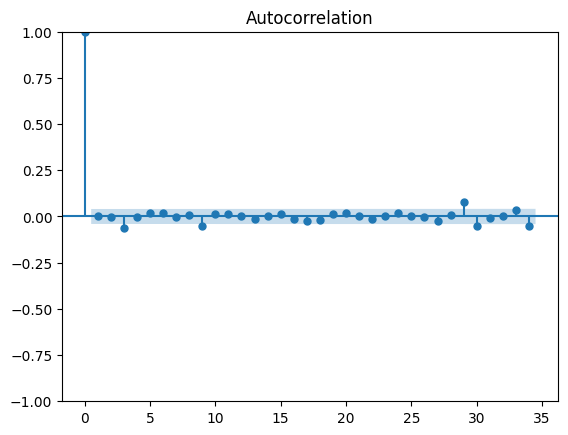

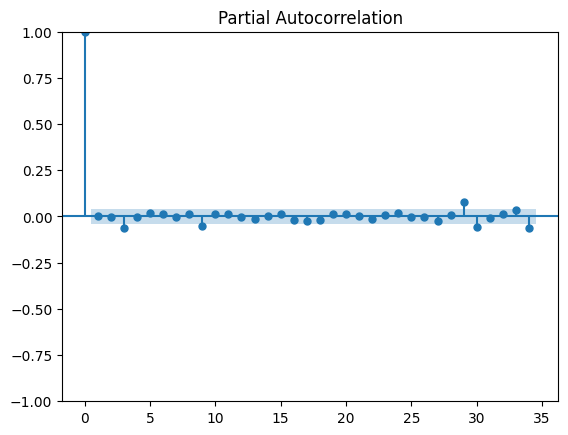

In [69]:
# Plot the ACF and PACF
plot_acf(differenced_data)
plot_pacf(differenced_data)
plt.show()


In [70]:
model = ARIMA(train_data, order=(0, 1, 0))

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [71]:
model_fit = model.fit()

In [72]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1871
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -15236.073
Date:                Thu, 20 Jun 2024   AIC                          30474.145
Time:                        17:01:08   BIC                          30479.679
Sample:                             0   HQIC                         30476.184
                               - 1871                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.986e+05   1.33e+04     52.663      0.000    6.73e+05    7.25e+05
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):              1224.44
Prob(Q):                              0.76   Pr

In [73]:
start = len(train_data) + 1
end = len(train_data) + len(test_data)
test_predictions = model_fit.predict(start=start, end=end)

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [74]:
test_data['Prediction'] = test_predictions.values
test_data

C:\Users\vanma\AppData\Local\Temp\ipykernel_3312\2547438770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Prediction'] = test_predictions.values


,Close,Prediction
Date,,
2022-07-06,61642.675781,62658.765625
2022-07-07,63928.875000,62658.765625
2022-07-08,62658.765625,62658.765625
2022-07-11,60965.285156,62658.765625
2022-07-12,60880.609375,62658.765625
...,...,...
2024-05-27,90200.000000,62658.765625
2024-05-28,90700.000000,62658.765625
2024-05-29,89800.000000,62658.765625


In [75]:
start = len(data) + 1
end = len(data) + 90
predict_90_days = model_fit.predict(start=start, end=end)
predict_90_days

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


2340    62658.765625
2341    62658.765625
2342    62658.765625
2343    62658.765625
2344    62658.765625
            ...     
2425    62658.765625
2426    62658.765625
2427    62658.765625
2428    62658.765625
2429    62658.765625
Name: predicted_mean, Length: 90, dtype: float64

In [76]:
from datetime import datetime, timedelta

def generate_date_array(start_date, length):
    date_array = []
    current_date = start_date

    while len(date_array) < length:
        if current_date.weekday() < 5:  # Check if it's a weekday
            date_array.append(current_date)
        current_date += timedelta(days=1)  # Move to the next day

    return date_array

In [77]:
predict_90_days = pd.Series(predict_90_days.values, index=generate_date_array(test_data.index[-1], 90))
predict_90_days.index.name = 'Date'

In [78]:
predict_30_days = predict_90_days[:30]
predict_60_days = predict_90_days[:60]

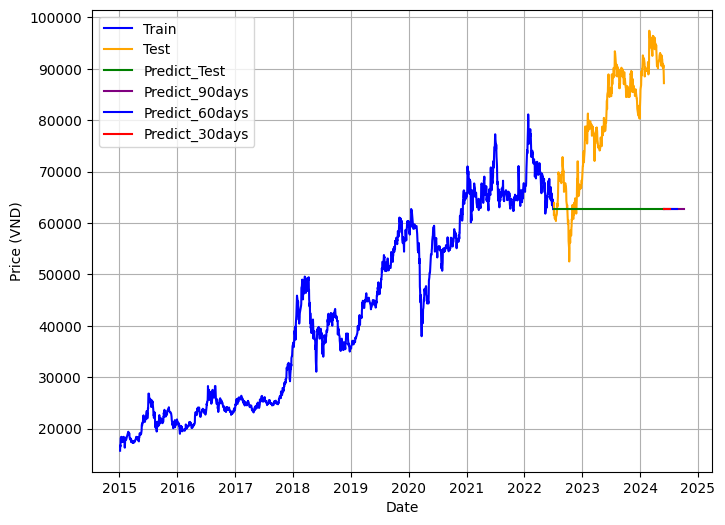

In [79]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(train_data.index, train_data['Close'], label='Train', color='blue')
plt.plot(test_data.index, test_data['Close'], label='Test', color='orange')
plt.plot(test_data.index, test_data['Prediction'], label='Predict_Test', color='green')
plt.plot(predict_90_days.index, predict_90_days, label='Predict_90days', color='purple')
plt.plot(predict_60_days.index, predict_60_days, label='Predict_60days', color='blue')
plt.plot(predict_30_days.index, predict_30_days, label='Predict_30days', color='red')
plt.xlabel('Date')
plt.ylabel('Price (VND)')
plt.grid(True)
plt.legend()
plt.show()

In [80]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data['Close'], test_data['Prediction']))

# Calculate MAE
mae = mean_absolute_error(test_data['Close'], test_data['Prediction'])

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test_data['Close'], test_data['Prediction'])

print("RMSE:", round(rmse, 3))
print("MAE:", round(mae, 3))
print("MAPE:", round(mape, 3))

RMSE: 20251.496
MAE: 17554.791
MAPE: 20.632


## Arima for BID dataset

In [81]:
data_path = '../../Dataset/BID.csv';

In [82]:
# Load the stock data
data = pd.read_csv(data_path) 
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data[['Close']]

In [83]:
# Display dataset information
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2345 entries, 2015-01-05 to 2024-05-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2345 non-null   float64
dtypes: float64(1)
memory usage: 36.6 KB
None
              Close
count   2345.000000
mean   25785.842410
std    10557.656795
min     9101.712891
25%    15240.078125
50%    26740.693359
75%    32138.220703
max    54400.000000


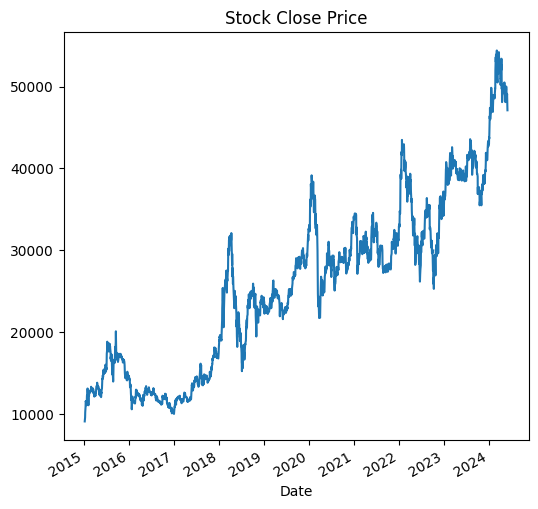

In [84]:
# Plot the data
data['Close'].plot(figsize=(6, 6))
plt.title("Stock Close Price")
plt.show()

In [85]:
# Split the data into training and test sets
train_size = int(len(data) * _split)
test_size = len(data) - train_size
train_data = data[0:train_size]
test_data = data[train_size:]

In [86]:
print("Training set shape:", train_data.shape)
print("Test set shape:", test_data.shape)

Training set shape: (1876, 1)
Test set shape: (469, 1)


In [87]:
# Perform initial ADF test
result = adfuller(data['Close'].dropna())
print(f'Initial ADF Statistic: {result[0]}')
print(f'Initial p-value: {result[1]}')

# Apply differencing iteratively until the series is stationary
differenced_data = data['Close']
diff_count = 0

while result[1] > 0.05:
    diff_count += 1
    differenced_data = differenced_data.diff().dropna()
    result = adfuller(differenced_data)
    print(f'Differencing Level: {diff_count}')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')

print(f'Series became stationary after {diff_count} differencing levels.')

Initial ADF Statistic: -1.0662395859139857
Initial p-value: 0.7283457408139377
Differencing Level: 1
ADF Statistic: -50.07262520728113
p-value: 0.0
Series became stationary after 1 differencing levels.


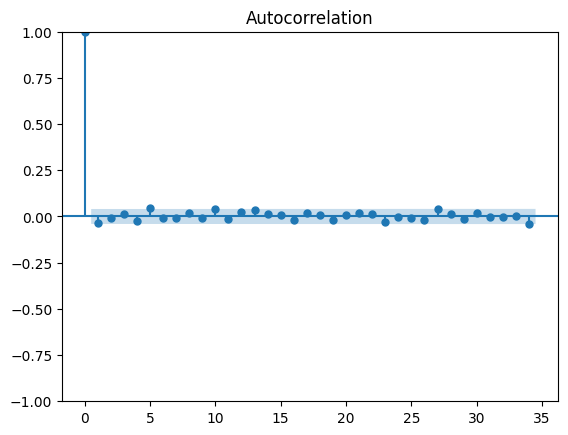

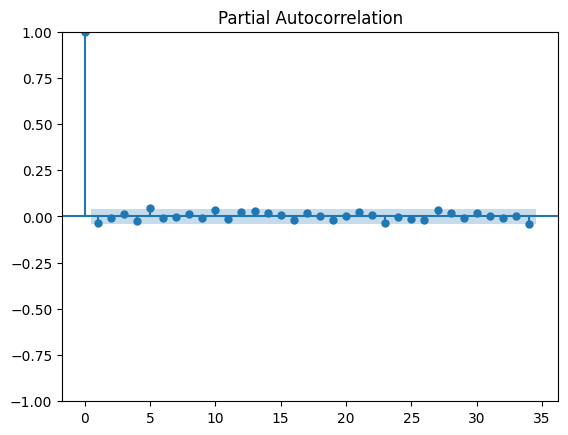

In [88]:
# Plot the ACF and PACF
plot_acf(differenced_data)
plot_pacf(differenced_data)
plt.show()


In [89]:
model = ARIMA(train_data, order=(0, 1, 0))

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [90]:
model_fit = model.fit()

In [91]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1876
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -14552.446
Date:                Thu, 20 Jun 2024   AIC                          29106.892
Time:                        17:01:09   BIC                          29112.428
Sample:                             0   HQIC                         29108.931
                               - 1876                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.226e+05   6571.234     49.094      0.000     3.1e+05    3.35e+05
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               812.92
Prob(Q):                              0.88   Pr

In [92]:
start = len(train_data) + 1
end = len(train_data) + len(test_data)
test_predictions = model_fit.predict(start=start, end=end)

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [93]:
test_data['Prediction'] = test_predictions.values
test_data

C:\Users\vanma\AppData\Local\Temp\ipykernel_3312\2547438770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Prediction'] = test_predictions.values


,Close,Prediction
Date,,
2022-07-13,31990.416016,32301.001953
2022-07-14,32079.154297,32301.001953
2022-07-15,31768.568359,32301.001953
2022-07-18,31502.351562,32301.001953
2022-07-19,31635.460938,32301.001953
...,...,...
2024-05-27,48900.000000,32301.001953
2024-05-28,49100.000000,32301.001953
2024-05-29,48600.000000,32301.001953


In [94]:
start = len(data) + 1
end = len(data) + 90
predict_90_days = model_fit.predict(start=start, end=end)
predict_90_days

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


2346    32301.001953
2347    32301.001953
2348    32301.001953
2349    32301.001953
2350    32301.001953
            ...     
2431    32301.001953
2432    32301.001953
2433    32301.001953
2434    32301.001953
2435    32301.001953
Name: predicted_mean, Length: 90, dtype: float64

In [95]:
from datetime import datetime, timedelta

def generate_date_array(start_date, length):
    date_array = []
    current_date = start_date

    while len(date_array) < length:
        if current_date.weekday() < 5:  # Check if it's a weekday
            date_array.append(current_date)
        current_date += timedelta(days=1)  # Move to the next day

    return date_array

In [96]:
predict_90_days = pd.Series(predict_90_days.values, index=generate_date_array(test_data.index[-1], 90))
predict_90_days.index.name = 'Date'

In [97]:
predict_30_days = predict_90_days[:30]
predict_60_days = predict_90_days[:60]

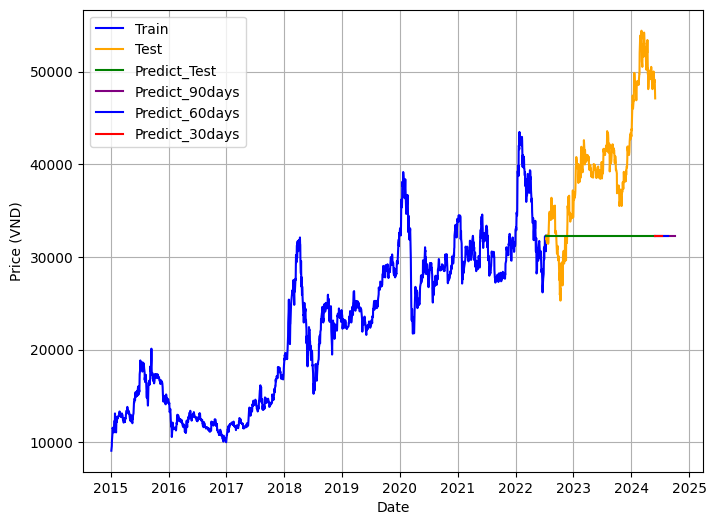

In [98]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(train_data.index, train_data['Close'], label='Train', color='blue')
plt.plot(test_data.index, test_data['Close'], label='Test', color='orange')
plt.plot(test_data.index, test_data['Prediction'], label='Predict_Test', color='green')
plt.plot(predict_90_days.index, predict_90_days, label='Predict_90days', color='purple')
plt.plot(predict_60_days.index, predict_60_days, label='Predict_60days', color='blue')
plt.plot(predict_30_days.index, predict_30_days, label='Predict_30days', color='red')
plt.xlabel('Date')
plt.ylabel('Price (VND)')
plt.grid(True)
plt.legend()
plt.show()

In [99]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data['Close'], test_data['Prediction']))

# Calculate MAE
mae = mean_absolute_error(test_data['Close'], test_data['Prediction'])

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test_data['Close'], test_data['Prediction'])

print("RMSE:", round(rmse, 3))
print("MAE:", round(mae, 3))
print("MAPE:", round(mape, 3))

RMSE: 9970.061
MAE: 8243.155
MAPE: 19.103


## Arima for CTG dataset

In [100]:
data_path = '../../Dataset/CTG.csv';

In [101]:
# Load the stock data
data = pd.read_csv(data_path) 
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data[['Close']]

In [102]:
# Display dataset information
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2345 entries, 2015-01-05 to 2024-05-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2345 non-null   float64
dtypes: float64(1)
memory usage: 36.6 KB
None
              Close
count   2345.000000
mean   19510.971566
std     7060.095727
min     9637.772461
25%    13451.279297
50%    16606.089844
75%    25729.027344
max    37719.050781


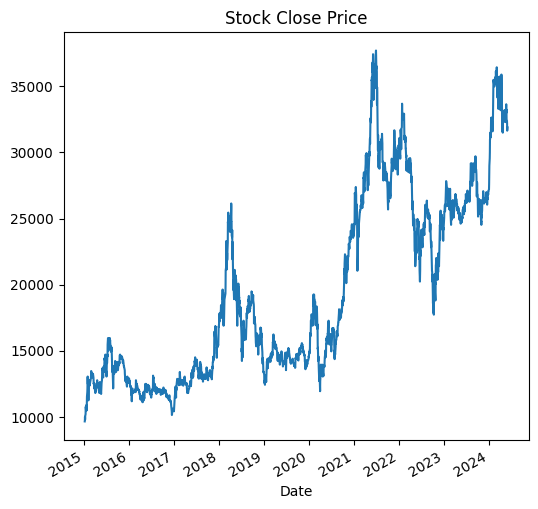

In [103]:
# Plot the data
data['Close'].plot(figsize=(6, 6))
plt.title("Stock Close Price")
plt.show()

In [104]:
# Split the data into training and test sets
train_size = int(len(data) * _split)
test_size = len(data) - train_size
train_data = data[0:train_size]
test_data = data[train_size:]

In [105]:
print("Training set shape:", train_data.shape)
print("Test set shape:", test_data.shape)

Training set shape: (1876, 1)
Test set shape: (469, 1)


In [106]:
# Perform initial ADF test
result = adfuller(data['Close'].dropna())
print(f'Initial ADF Statistic: {result[0]}')
print(f'Initial p-value: {result[1]}')

# Apply differencing iteratively until the series is stationary
differenced_data = data['Close']
diff_count = 0

while result[1] > 0.05:
    diff_count += 1
    differenced_data = differenced_data.diff().dropna()
    result = adfuller(differenced_data)
    print(f'Differencing Level: {diff_count}')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')

print(f'Series became stationary after {diff_count} differencing levels.')

Initial ADF Statistic: -1.3022211165237332
Initial p-value: 0.6281555385005244
Differencing Level: 1
ADF Statistic: -51.10753306643303
p-value: 0.0
Series became stationary after 1 differencing levels.


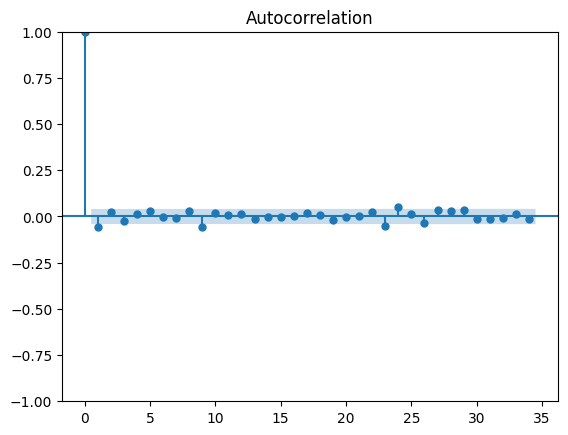

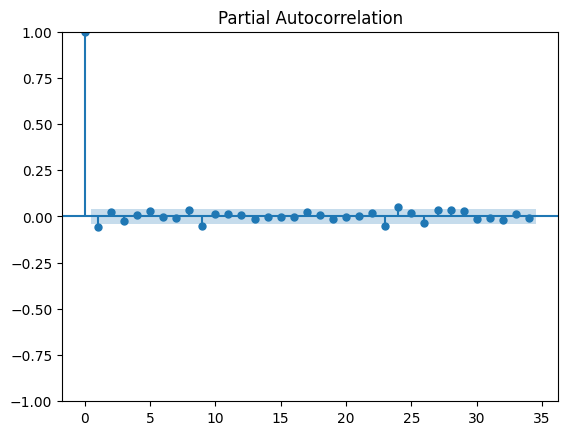

In [107]:
# Plot the ACF and PACF
plot_acf(differenced_data)
plot_pacf(differenced_data)
plt.show()


In [108]:
model = ARIMA(train_data, order=(0, 1, 0))

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [109]:
model_fit = model.fit()

In [110]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1876
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -14066.153
Date:                Thu, 20 Jun 2024   AIC                          28134.306
Time:                        17:01:10   BIC                          28139.843
Sample:                             0   HQIC                         28136.346
                               - 1876                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       1.92e+05   3498.632     54.892      0.000    1.85e+05    1.99e+05
Ljung-Box (L1) (Q):                   1.08   Jarque-Bera (JB):              1570.99
Prob(Q):                              0.30   Pr

In [111]:
start = len(train_data) + 1
end = len(train_data) + len(test_data)
test_predictions = model_fit.predict(start=start, end=end)

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [112]:
test_data['Prediction'] = test_predictions.values
test_data

C:\Users\vanma\AppData\Local\Temp\ipykernel_3312\2547438770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Prediction'] = test_predictions.values


,Close,Prediction
Date,,
2022-07-13,23760.197266,22999.511719
2022-07-14,24162.912109,22999.511719
2022-07-15,24162.912109,22999.511719
2022-07-18,24073.419922,22999.511719
2022-07-19,23760.197266,22999.511719
...,...,...
2024-05-27,32400.000000,22999.511719
2024-05-28,32200.000000,22999.511719
2024-05-29,31650.000000,22999.511719


In [113]:
start = len(data) + 1
end = len(data) + 90
predict_90_days = model_fit.predict(start=start, end=end)
predict_90_days

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


2346    22999.511719
2347    22999.511719
2348    22999.511719
2349    22999.511719
2350    22999.511719
            ...     
2431    22999.511719
2432    22999.511719
2433    22999.511719
2434    22999.511719
2435    22999.511719
Name: predicted_mean, Length: 90, dtype: float64

In [114]:
from datetime import datetime, timedelta

def generate_date_array(start_date, length):
    date_array = []
    current_date = start_date

    while len(date_array) < length:
        if current_date.weekday() < 5:  # Check if it's a weekday
            date_array.append(current_date)
        current_date += timedelta(days=1)  # Move to the next day

    return date_array

In [115]:
predict_90_days = pd.Series(predict_90_days.values, index=generate_date_array(test_data.index[-1], 90))
predict_90_days.index.name = 'Date'

In [116]:
predict_30_days = predict_90_days[:30]
predict_60_days = predict_90_days[:60]

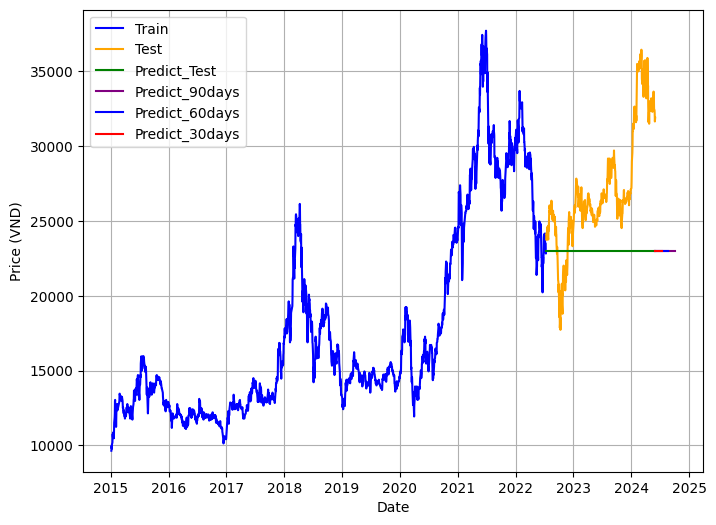

In [117]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(train_data.index, train_data['Close'], label='Train', color='blue')
plt.plot(test_data.index, test_data['Close'], label='Test', color='orange')
plt.plot(test_data.index, test_data['Prediction'], label='Predict_Test', color='green')
plt.plot(predict_90_days.index, predict_90_days, label='Predict_90days', color='purple')
plt.plot(predict_60_days.index, predict_60_days, label='Predict_60days', color='blue')
plt.plot(predict_30_days.index, predict_30_days, label='Predict_30days', color='red')
plt.xlabel('Date')
plt.ylabel('Price (VND)')
plt.grid(True)
plt.legend()
plt.show()

In [118]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data['Close'], test_data['Prediction']))

# Calculate MAE
mae = mean_absolute_error(test_data['Close'], test_data['Prediction'])

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test_data['Close'], test_data['Prediction'])

print("RMSE:", round(rmse, 3))
print("MAE:", round(mae, 3))
print("MAPE:", round(mape, 3))

RMSE: 5601.481
MAE: 4502.582
MAPE: 15.535
